In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape') #Reading the csv file.
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
#Removing the coloumns which dont add value for the analysis.
to_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','CUSTOMERNAME','ORDERNUMBER','QTR_ID','ORDERDATE']
df = df.drop(to_drop, axis=1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Shipped,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Shipped,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Shipped,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Shipped,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [4]:
df.nunique() #Checking unique values.

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
STATUS                6
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [5]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [6]:
#Encodning Categorical Variables for easier processing.
status_dict = {'Shipped':1, 'Cancelled':2, 'On Hold':2, 'Disputed':2, 'In Process':0, 'Resolved':0}
df['STATUS'].replace(status_dict, inplace=True)
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes
df = pd.get_dummies(data=df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'])
df.dtypes

QUANTITYORDERED                   int64
PRICEEACH                       float64
ORDERLINENUMBER                   int64
SALES                           float64
STATUS                            int64
MONTH_ID                          int64
YEAR_ID                           int64
MSRP                              int64
PRODUCTCODE                        int8
PRODUCTLINE_Classic Cars          uint8
PRODUCTLINE_Motorcycles           uint8
PRODUCTLINE_Planes                uint8
PRODUCTLINE_Ships                 uint8
PRODUCTLINE_Trains                uint8
PRODUCTLINE_Trucks and Buses      uint8
PRODUCTLINE_Vintage Cars          uint8
DEALSIZE_Large                    uint8
DEALSIZE_Medium                   uint8
DEALSIZE_Small                    uint8
COUNTRY_Australia                 uint8
COUNTRY_Austria                   uint8
COUNTRY_Belgium                   uint8
COUNTRY_Canada                    uint8
COUNTRY_Denmark                   uint8
COUNTRY_Finland                   uint8


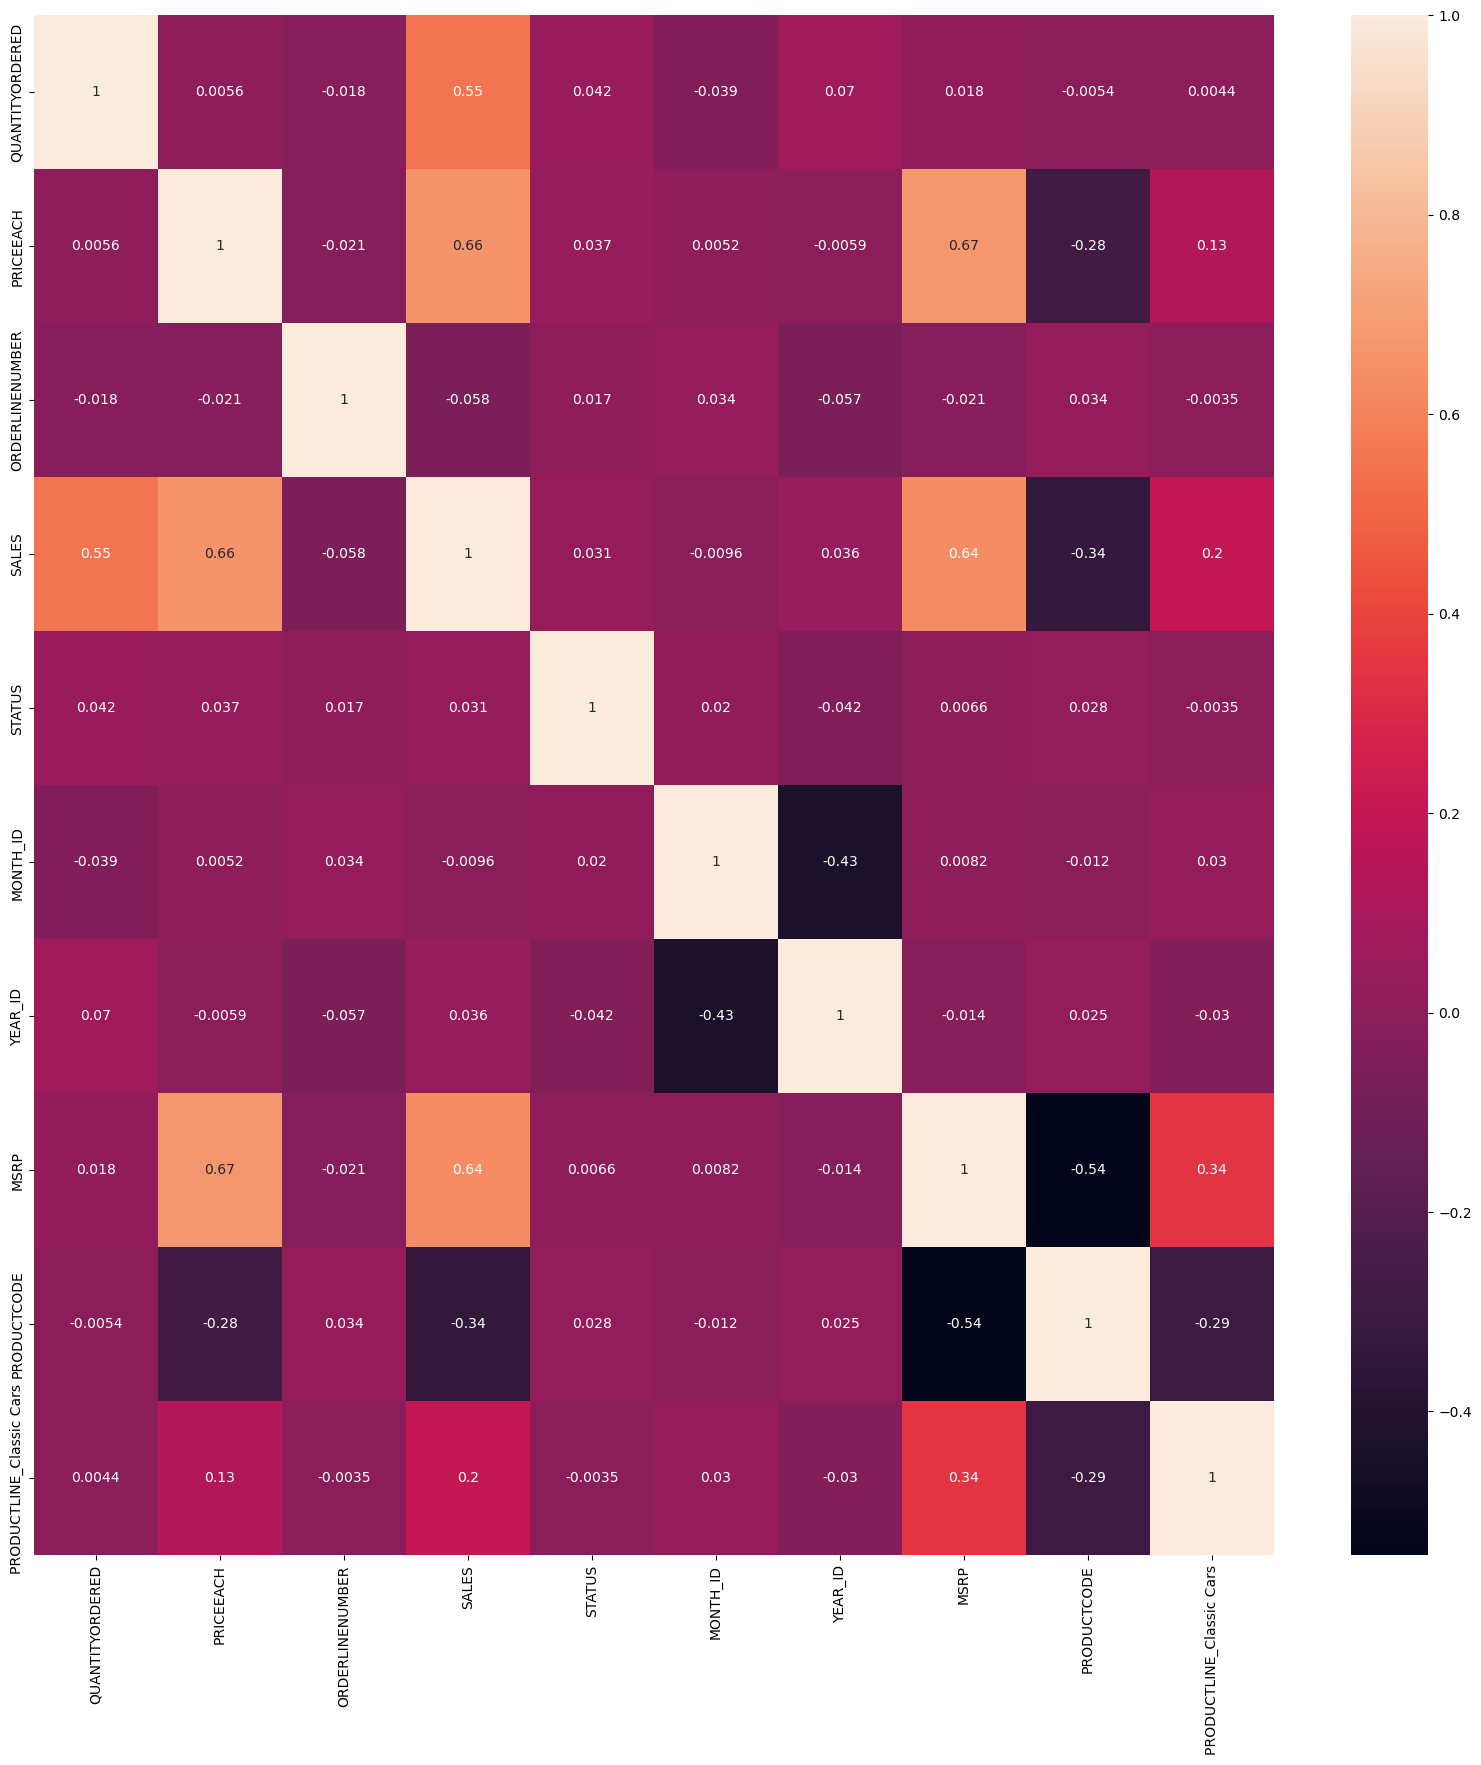

In [7]:
#Using Heatmaps to find links between the data
plt.figure(figsize = (20, 20))
corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True);

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

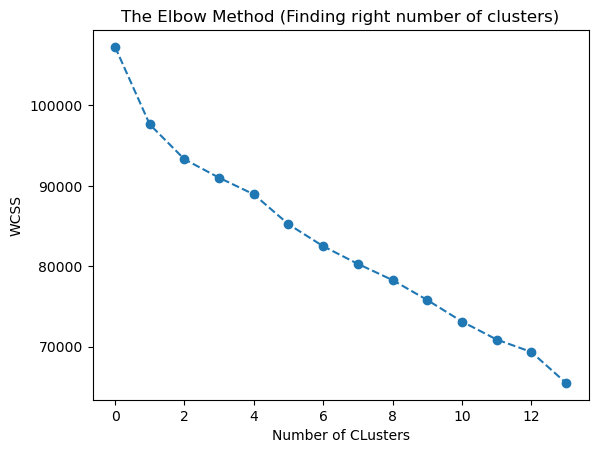

In [9]:
# Scale the data
std = StandardScaler()
sdf = std.fit_transform(df)
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(sdf)
    wcss.append(km.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding right number of clusters)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Applying k-means with 5 clusters as the elbow seems to form at 5 clusters
km = KMeans(n_clusters=5, random_state=1)
km.fit(sdf)
cluster_labels = km.labels_
df = df.assign(Cluster=cluster_labels)
df.head()

c:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,Cluster
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,1,5,2003,95,0,0,...,0,0,0,0,0,0,0,0,0,2
2,41,94.74,2,3884.34,1,7,2003,95,0,0,...,0,0,0,0,0,0,0,0,0,4
3,45,83.26,6,3746.70,1,8,2003,95,0,0,...,0,0,0,0,0,0,0,0,1,4
4,49,100.00,14,5205.27,1,10,2003,95,0,0,...,0,0,0,0,0,0,0,0,1,4


In [11]:
df = df.groupby(['Cluster']).mean() #Grouping by Cluster
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
Cluster,,,,,,,,,,,,,,,,,,,,,
0,34.730769,83.855470,6.799145,3053.150128,1.064103,6.931624,2003.816239,86.128205,89.337607,0.000000,...,0.025641,0.021368,0.000000,0.000000,0.017094,0.166667,0.042735,0.000000,0.098291,0.299145
1,35.719141,96.779606,6.506261,4487.202773,1.008945,7.214669,2003.790698,133.642218,36.373882,1.000000,...,0.014311,0.010733,0.041145,0.017889,0.025045,0.119857,0.019678,0.048301,0.051878,0.338104
2,30.665187,67.504512,6.624334,2018.905266,0.996448,7.111901,2003.807282,75.121670,60.786856,0.276199,...,0.052398,0.023979,0.031083,0.009769,0.031972,0.113677,0.015986,0.003552,0.050622,0.343694
3,47.222930,99.799554,5.369427,8293.753248,1.038217,6.770701,2003.910828,158.184713,26.242038,0.617834,...,0.044586,0.019108,0.031847,0.006369,0.025478,0.108280,0.012739,0.000000,0.025478,0.407643
4,38.862115,94.735582,6.323963,4329.904659,1.010710,7.089692,2003.824632,107.145917,50.867470,0.000000,...,0.044177,0.014726,0.029451,0.005355,0.028112,0.121821,0.021419,0.000000,0.041499,0.393574


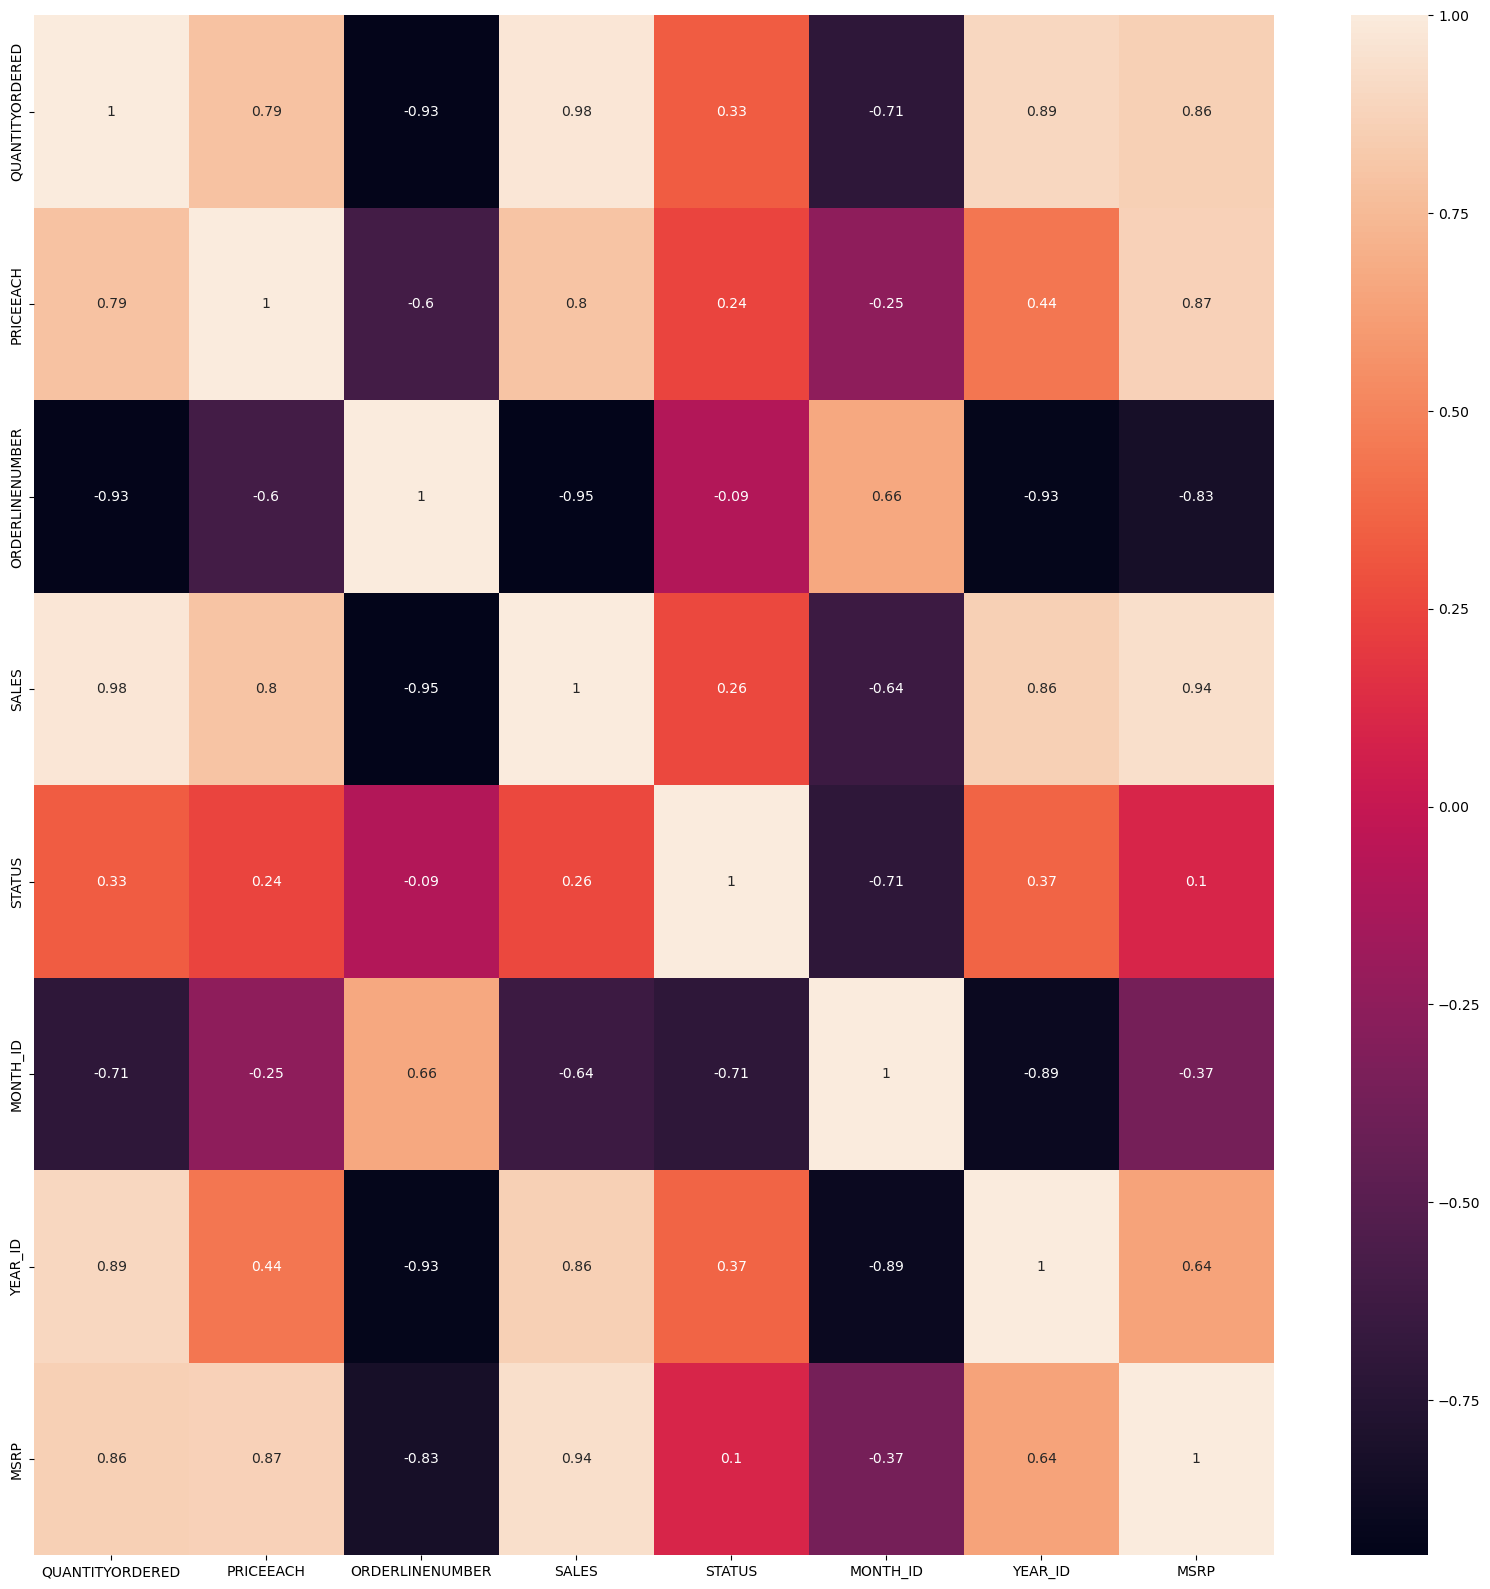

In [12]:
#Heatmap after Kmeans clustering
plt.figure(figsize = (20, 20))
corr_matrix = df.iloc[:, :8].corr()
sns.heatmap(corr_matrix, annot=True);